In [169]:
#!pip install mlxtend
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df = pd.read_csv('C:/Users/adity/Downloads/Data/vertebral_column_data.txt',delimiter = ' ')
df.columns=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope','pelvic radius','grade of spondylolisthesis','Normal (NO) or Abnormal (AB)']
df.to_csv('vertebral_column_data.csv',index=None)
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Normal (NO) or Abnormal (AB)
0,39.06,10.06,25.02,29.00,114.41,4.56,AB
1,68.83,22.22,50.09,46.61,105.99,-3.53,AB
2,69.30,24.65,44.31,44.64,101.87,11.21,AB
3,49.71,9.65,28.32,40.06,108.17,7.92,AB
4,40.25,13.92,25.12,26.33,130.33,2.23,AB


In [170]:
df['Normal (NO) or Abnormal (AB)'].replace(['AB', 'NO'],[0, 1], inplace=True)
X_df=df
X_df.info(verbose=True)
X_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pelvic incidence              309 non-null    float64
 1   pelvic tilt                   309 non-null    float64
 2   lumbar lordosis angle         309 non-null    float64
 3   sacral slope                  309 non-null    float64
 4   pelvic radius                 309 non-null    float64
 5   grade of spondylolisthesis    309 non-null    float64
 6   Normal (NO) or Abnormal (AB)  309 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.0 KB


,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Normal (NO) or Abnormal (AB)
0,39.06,10.06,25.02,29.00,114.41,4.56,0
1,68.83,22.22,50.09,46.61,105.99,-3.53,0
2,69.30,24.65,44.31,44.64,101.87,11.21,0
3,49.71,9.65,28.32,40.06,108.17,7.92,0
4,40.25,13.92,25.12,26.33,130.33,2.23,0


In [13]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic incidence,309.0,60.488285,17.263462,26.15,46.43,58.60,72.96,129.83
pelvic tilt,309.0,17.526699,10.020300,-6.55,10.66,16.30,21.94,49.43
lumbar lordosis angle,309.0,51.970583,18.570553,14.00,37.00,49.78,63.00,125.74
sacral slope,309.0,42.961877,13.443779,13.37,33.34,42.44,52.74,121.43
pelvic radius,309.0,117.982848,13.293909,70.08,110.71,118.34,125.48,163.07
grade of spondylolisthesis,309.0,26.382654,37.589284,-11.06,1.63,12.07,41.42,418.54
Normal (NO) or Abnormal (AB),309.0,0.323625,0.468618,0.00,0.00,0.00,1.00,1.00


In [14]:
print(X_df.isnull().sum())

pelvic incidence                0
pelvic tilt                     0
lumbar lordosis angle           0
sacral slope                    0
pelvic radius                   0
grade of spondylolisthesis      0
Normal (NO) or Abnormal (AB)    0
dtype: int64


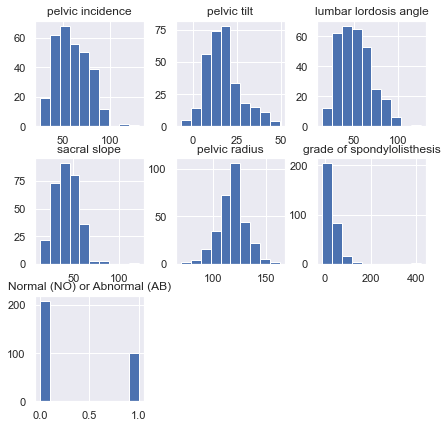

In [171]:
a = X_df.hist(figsize = (7,7))

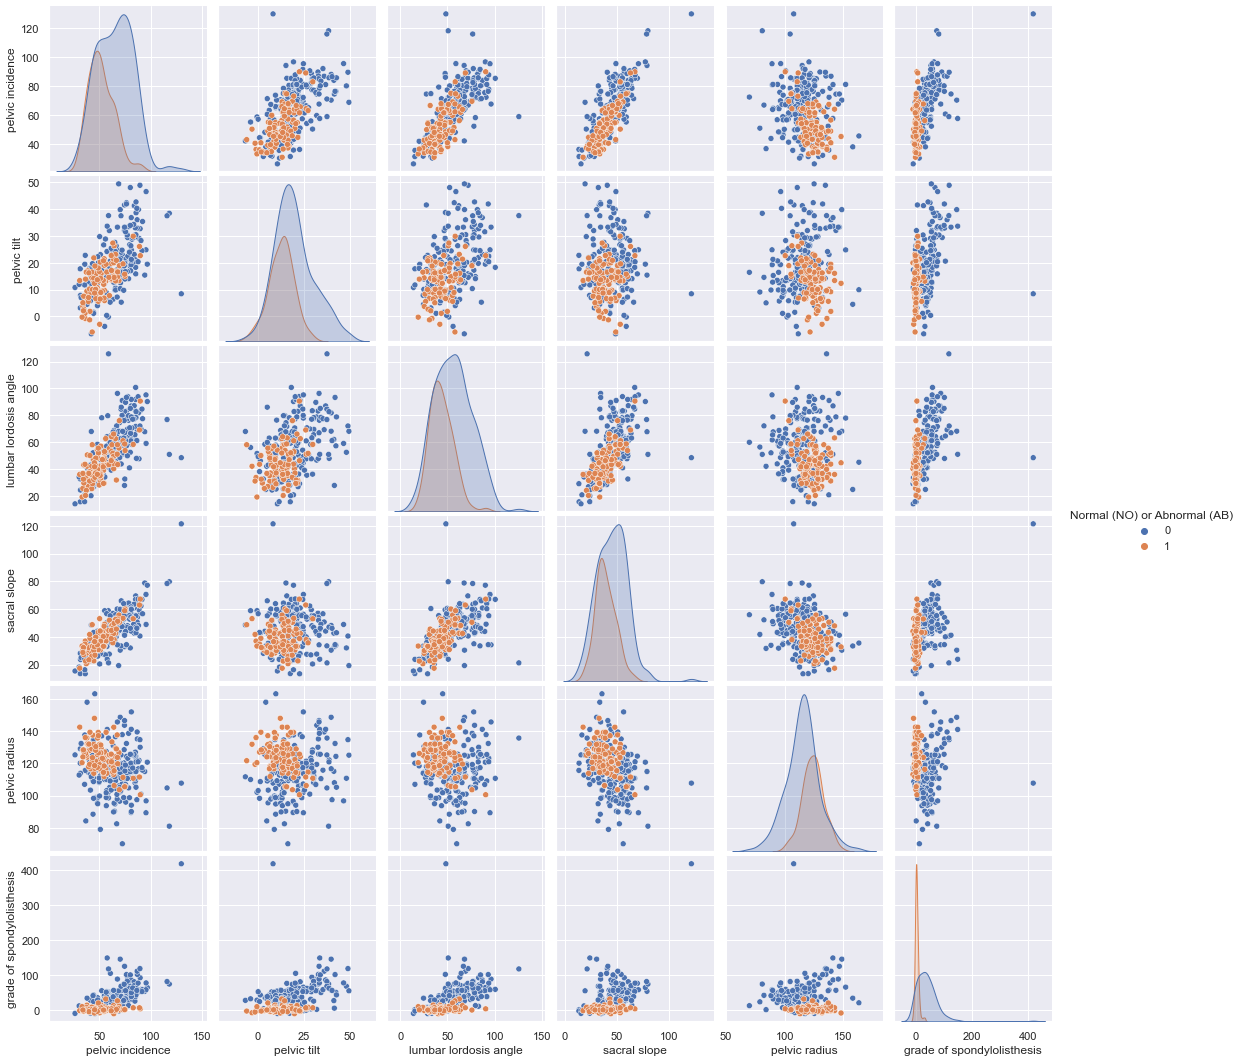

In [19]:
p=sns.pairplot(X_df, hue = 'Normal (NO) or Abnormal (AB)')

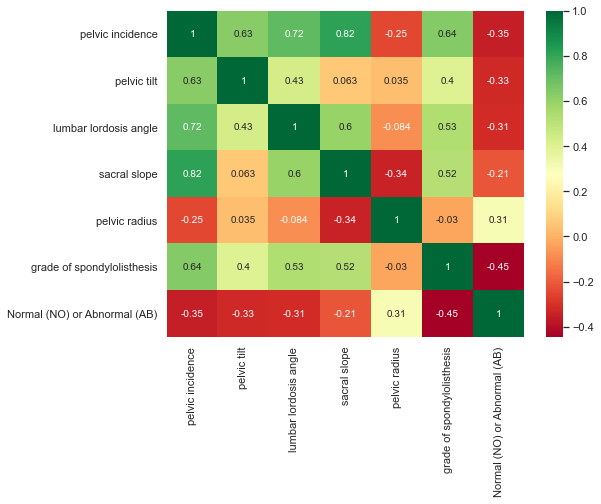

In [172]:
plt.figure(figsize=(8,6))  #the figure size is set to 10,8

p=sns.heatmap(X_df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [155]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(X_df.drop(["Normal (NO) or Abnormal (AB)"],axis = 1),),
        columns=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope','pelvic radius','grade of spondylolisthesis'])

In [175]:

X =  X[['sacral slope','pelvic radius']]
X.head()

,sacral slope,pelvic radius
0,-1.040223,-0.269194
1,0.271802,-0.903594
2,0.125028,-1.214013
3,-0.216203,-0.739343
4,-1.239150,0.930289


In [176]:
#X = X_df.drop("Normal (NO) or Abnormal (AB)",axis = 1)
y = X_df['Normal (NO) or Abnormal (AB)']

In [177]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [178]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [179]:
## this score comes from testing on the same datapoints that were used for training only
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [180]:
## this score is derived from testing on the datapoints that were split in the beginning which are used for testing only
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 72.81553398058253 % and k = [1, 2, 5, 8]


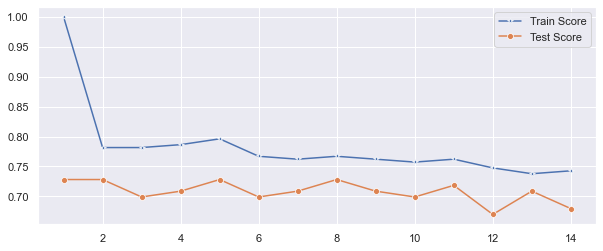

In [181]:
#Result Visualisation
plt.figure(figsize=(10,4))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [182]:
#Setup a knn classifier with k neighbors i.e, in this case it's 9
knn = KNeighborsClassifier(9)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7087378640776699

In [183]:

y_pred=knn.predict(X_test)


In [184]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Confusion matrix
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred)
print(report)
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('KNN Classification Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[53 17]
 [13 20]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        70
           1       0.54      0.61      0.57        33

    accuracy                           0.71       103
   macro avg       0.67      0.68      0.68       103
weighted avg       0.72      0.71      0.71       103

KNN Classification Accuracy of the model: 70.87%


Text(0, 0.5, 'pelvic radius')

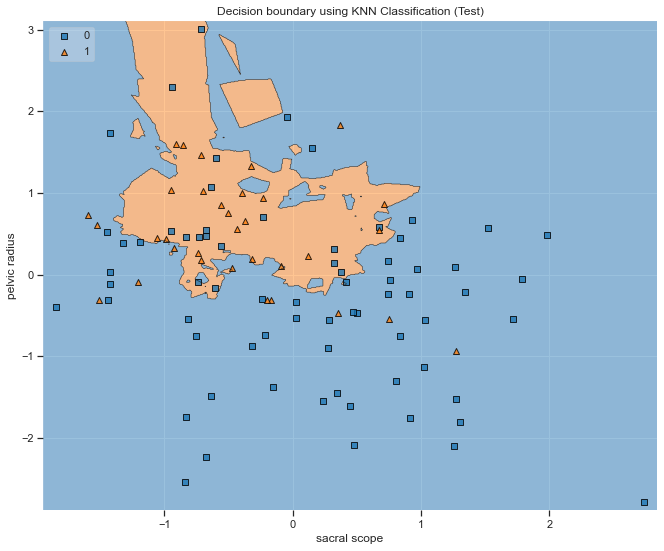

In [188]:

#value = 2000
#width = 10000
# Plotting the decision boundary
plt.figure(figsize=(11,9))
plot_decision_regions(X_test.values, y_test.values, clf = knn, legend = 2,
                      zoom_factor= 10)
plt.title("Decision boundary using KNN Classification (Test)")
plt.xlabel("sacral scope")
plt.ylabel("pelvic radius")

In [106]:
#y_test.shape
X_test2.shape

(103, 2)

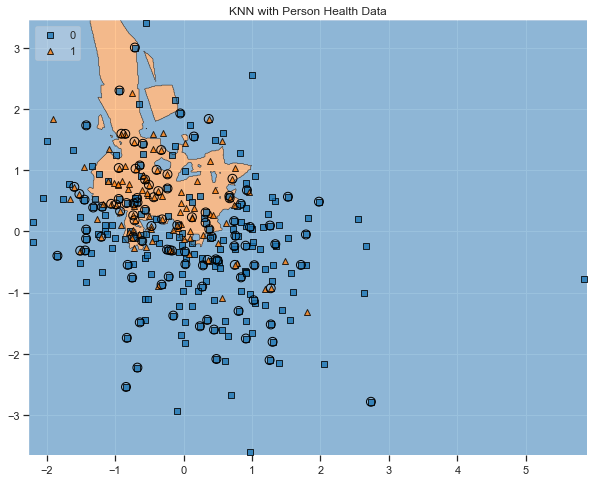

In [186]:
value = 2000
width = 100000
plt.figure(figsize=(10,8))
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value , 5: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width},
                      X_highlight=X_test.values, zoom_factor= 20)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Person Health Data')
plt.show()